In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0
%pylab inline
%load_ext autoreload
%autoreload 2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0
Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
from ssl_neuron.datasets import GraphDataset, build_dataloader
from ssl_neuron.utils import plot_neuron, adjacency_to_neighbors

#### Load config

In [5]:
config = json.load(open('../configs/config.json'))

#### Load dataset

In [7]:
dset = GraphDataset(config, mode='val')

43it [00:00, 289.60it/s]


In [8]:
feat, neigh = dset.__getsingleitem__(0)

In [9]:
feat.shape, len(neigh)

((1000, 8), 1000)

#### Plot neuron

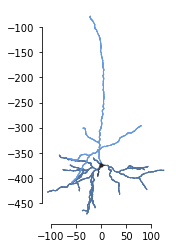

In [10]:
plot_neuron(neigh, feat)

#### Load dataloaders

In [12]:
train_loader, val_loader = build_dataloader(config)

387it [00:02, 187.62it/s]
43it [00:00, 189.74it/s]


In [13]:
features1, features2, adj_matrix1, adj_matrix2 = next(iter(train_loader))

In [15]:
neigh1 = adjacency_to_neighbors(adj_matrix1[0])
neigh2 = adjacency_to_neighbors(adj_matrix2[0])

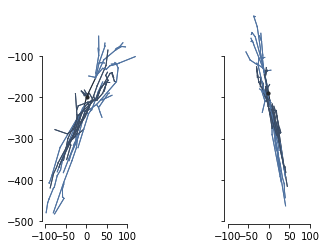

In [16]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

plot_neuron(neigh1, features1[0].numpy(), ax=ax[0])
plot_neuron(neigh2, features2[0].numpy(), ax=ax[1])